In [18]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import Tweeter_keys as k

In [6]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [7]:
plt.style.use('seaborn-dark-palette')

In [21]:
api_key = k.api_key
secret_key = k.secret_key
accessToken = k.access_token
accessTokenSecret = k.access_token_secret

In [22]:
auth = tweepy.OAuthHandler(api_key, secret_key)

auth.set_access_token(accessToken,accessTokenSecret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [31]:
posts = api.user_timeline(
    screen_name='BillGates', 
    count=200, 
    # lang='en', 
    tweet_mode='extended')

In [51]:
print('5 Recent tweets')
i = 1
for tweet in posts[0:10]:
    print(f'{i} - {tweet.full_text}\n\n')
    i+=1

5 Recent tweets
1 - In a crisis, we can always look for the helpers—the people who are putting their lives on the line to aid refugees and victims of the invasion—and support them. I’m proud to support the UN’s refugee agency and urge the global community to do the same. https://t.co/5fkRU6UmCK


2 - It’s gut-wrenching to see the people of Ukraine suffering so much. The world feels especially heavy right now, with each day bringing news of families torn apart in Afghanistan, Ukraine, and so many other places.


3 - I’m optimistic about our ability to prevent the next pandemic. We have learned so much from COVID, and the innovations have been tremendous. https://t.co/QDfUnEbYeJ


4 - The Global Fund is one of the best investments in global health. Fully funding its programs for the next 3 years is critical to ending HIV, TB, and malaria while helping ensure COVID-19 is the last pandemic. https://t.co/t4N4LhlaUb


5 - At the end of the day, Paul’s most lasting impact can be found in the 

In [37]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,"In a crisis, we can always look for the helper..."
1,It’s gut-wrenching to see the people of Ukrain...
2,I’m optimistic about our ability to prevent th...
3,The Global Fund is one of the best investments...
4,"At the end of the day, Paul’s most lasting imp..."


In [39]:
import MyMLFunctions as mmf

In [40]:
mmf.text_cleantext??

Signature:
mmf.text_cleantext(
    text,
    stopwords=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no

In [48]:
def cleanText(txt):
    txt = re.sub(r'@[A-Za-z0-9]+', 'username', txt)   # specifies to python that it is a raw string
    txt = re.sub(r'#', 'hash',txt)
    txt = re.sub(r'RT[\s]+','',txt)
    txt = re.sub(r'https?:\/\/\S+','link', txt)
    return txt

In [70]:
def cleanText1(txt):
    txt = re.sub(r'@[A-Za-z0-9]+', '', txt)   # specifies to python that it is a raw string
    txt = re.sub(r'#', '',txt)
    txt = re.sub(r'RT[\s]+','',txt)
    txt = re.sub(r'https?:\/\/\S+','', txt)
    return txt

In [71]:
df['clean1'] = df.Tweets.apply(cleanText1)
df.head()

,Tweets,clean,subjectivity,polarity,clean1
0,"In a crisis, we can always look for the helper...","In a crisis, we can always look for the helper...",0.375000,0.266667,"In a crisis, we can always look for the helper..."
1,It’s gut-wrenching to see the people of Ukrain...,It’s gut-wrenching to see the people of Ukrain...,0.522143,0.092143,It’s gut-wrenching to see the people of Ukrain...
2,I’m optimistic about our ability to prevent th...,I’m optimistic about our ability to prevent th...,0.400000,0.177778,I’m optimistic about our ability to prevent th...
3,The Global Fund is one of the best investments...,The Global Fund is one of the best investments...,0.194444,0.166667,The Global Fund is one of the best investments...
4,"At the end of the day, Paul’s most lasting imp...","At the end of the day, Paul’s most lasting imp...",0.425000,0.325000,"At the end of the day, Paul’s most lasting imp..."


In [50]:
df.Tweets[0],df.clean[0]

('In a crisis, we can always look for the helpers—the people who are putting their lives on the line to aid refugees and victims of the invasion—and support them. I’m proud to support the UN’s refugee agency and urge the global community to do the same. https://t.co/5fkRU6UmCK',
 'In a crisis, we can always look for the helpers—the people who are putting their lives on the line to aid refugees and victims of the invasion—and support them. I’m proud to support the UN’s refugee agency and urge the global community to do the same. link')

In [52]:
df.Tweets[10],df.clean[10]

('I’m hopeful that the world can come together to end this pandemic and prevent the next one. Thanks Dax Shepard, Monica Padman, and @davidfarrier for the great conversation. https://t.co/24IHu2YHxq',
 'I’m hopeful that the world can come together to end this pandemic and prevent the next one. Thanks Dax Shepard, Monica Padman, and username for the great conversation. link')

In [53]:
def getSubjectvity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [54]:
df['subjectivity'] = df.clean.apply(getSubjectvity)
df['polarity'] = df.clean.apply(getPolarity)
df.head(10)

,Tweets,clean,subjectivity,polarity
0,"In a crisis, we can always look for the helper...","In a crisis, we can always look for the helper...",0.375000,0.266667
1,It’s gut-wrenching to see the people of Ukrain...,It’s gut-wrenching to see the people of Ukrain...,0.522143,0.092143
2,I’m optimistic about our ability to prevent th...,I’m optimistic about our ability to prevent th...,0.400000,0.177778
3,The Global Fund is one of the best investments...,The Global Fund is one of the best investments...,0.194444,0.166667
4,"At the end of the day, Paul’s most lasting imp...","At the end of the day, Paul’s most lasting imp...",0.425000,0.325000
5,His work will continue through Partners in Hea...,His work will continue through Partners in Hea...,0.700000,0.700000
6,Paul was never happier than when he was caring...,Paul was never happier than when he was caring...,0.000000,0.000000
7,"What a devastating loss. Paul is a hero, and I...","What a devastating loss. Paul is a hero, and I...",0.721429,-0.073377
8,It has been over a year since wild polio paral...,It has been over a year since wild polio paral...,0.633333,0.566667
9,Thank you @ImranKhanPTI for the productive dis...,Thank you username for the productive discussi...,0.000000,0.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tweets        200 non-null    object 
 1   clean         200 non-null    object 
 2   subjectivity  200 non-null    float64
 3   polarity      200 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


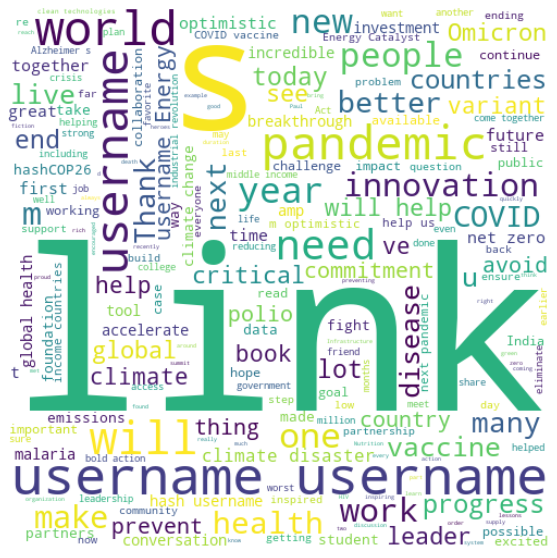

In [69]:
allwords = ' '.join([tweet for tweet in df.clean])
wc = WordCloud(
    width = 500,
    height =500,
    random_state = 21,
    max_font_size = 1000,
    background_color = 'white'
).generate(allwords)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis(False)
plt.show()

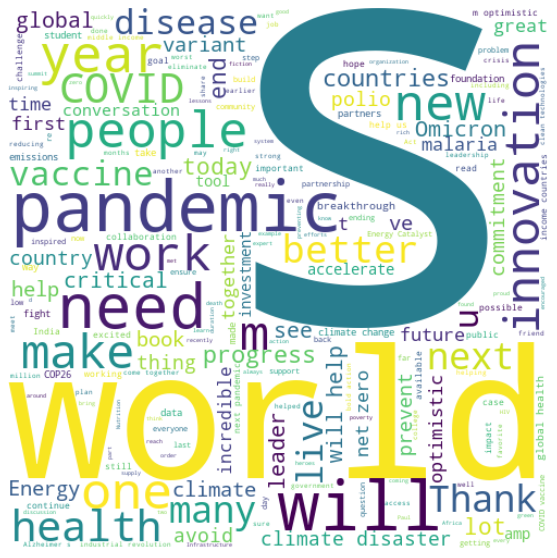

In [72]:
allwords = ' '.join([tweet for tweet in df.clean1])
wc = WordCloud(
    width = 500,
    height =500,
    random_state = 21,
    max_font_size = 1000,
    background_color = 'white'
).generate(allwords)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis(False)
plt.show()

In [74]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

In [75]:
df['analysis'] = df.polarity.apply(getAnalysis)
df

,Tweets,clean,subjectivity,polarity,clean1,analysis
0,"In a crisis, we can always look for the helper...","In a crisis, we can always look for the helper...",0.375000,0.266667,"In a crisis, we can always look for the helper...",Positive
1,It’s gut-wrenching to see the people of Ukrain...,It’s gut-wrenching to see the people of Ukrain...,0.522143,0.092143,It’s gut-wrenching to see the people of Ukrain...,Positive
2,I’m optimistic about our ability to prevent th...,I’m optimistic about our ability to prevent th...,0.400000,0.177778,I’m optimistic about our ability to prevent th...,Positive
3,The Global Fund is one of the best investments...,The Global Fund is one of the best investments...,0.194444,0.166667,The Global Fund is one of the best investments...,Positive
4,"At the end of the day, Paul’s most lasting imp...","At the end of the day, Paul’s most lasting imp...",0.425000,0.325000,"At the end of the day, Paul’s most lasting imp...",Positive
...,...,...,...,...,...,...
195,I found the book to be valuable on a number of...,I found the book to be valuable on a number of...,0.500000,0.625000,I found the book to be valuable on a number of...,Positive
196,"The first time I met David Sengeh, I was blown...","The first time I met David Sengeh, I was blown...",0.704167,0.525000,"The first time I met David Sengeh, I was blown...",Positive
197,Africa's success against wild polio last year ...,Africa's success against wild polio last year ...,0.327778,0.233333,Africa's success against wild polio last year ...,Positive
198,None of us would be where we are today without...,None of us would be where we are today without...,0.966667,0.522222,None of us would be where we are today without...,Positive


In [87]:
j = 1
sorteddf = df.sort_values(by='polarity')
# while j<11:
for i in range(len(sorteddf)):
    if sorteddf.analysis[i] == 'Positive':
        print(f'{j} - {sorteddf.clean[i]}\n')
        j+=1
    if j == 11:
        break

1 - In a crisis, we can always look for the helpers—the people who are putting their lives on the line to aid refugees and victims of the invasion—and support them. I’m proud to support the UN’s refugee agency and urge the global community to do the same. link

2 - It’s gut-wrenching to see the people of Ukraine suffering so much. The world feels especially heavy right now, with each day bringing news of families torn apart in Afghanistan, Ukraine, and so many other places.

3 - I’m optimistic about our ability to prevent the next pandemic. We have learned so much from COVID, and the innovations have been tremendous. link

4 - The Global Fund is one of the best investments in global health. Fully funding its programs for the next 3 years is critical to ending HIV, TB, and malaria while helping ensure COVID-19 is the last pandemic. link

5 - At the end of the day, Paul’s most lasting impact can be found in the patients he loved so dearly—all of the people who are alive today because he 

In [94]:
j = 1
sorteddf = df.sort_values(by='polarity',ascending=False)
# while j<11:
for i in range(len(sorteddf)):
    if sorteddf.analysis[i] == 'Negative':
        print(f'{j} - {sorteddf.clean[i]}\n')
        j+=1
    if j == 11:
        break

1 - What a devastating loss. Paul is a hero, and I was fortunate to call him a friend. I have never known anyone who was more passionate about reducing the world’s worst inequities in health—or who did more to live by his values. link

2 - One person’s act of bravery can spark dramatic change in hundreds of lives. username’s story is a powerful example. link

3 - I wholeheartedly agree with Larry's view that all companies need to be actively preparing for their net zero transition - shareholders, employees, customers, communities, and regulators expect it. link

4 - The omicron surge is an unfortunate reminder that the only way to eliminate the threat of COVID-19 somewhere is to eliminate it everywhere. That’s why username is joining username to renew our investment in username. link

5 - ICYMI here’s a recap of my conversation with username. We chatted about this pandemic, how to prevent the next one, and a few things in between. link

6 - username: username username username username

In [93]:
j = 1
sorteddf = df.sort_values(by='polarity')
# while j<11:
for i in range(len(sorteddf)):
    if sorteddf.analysis[i] == 'Neutral':
        print(f'{j} - {sorteddf.clean[i]}\n')
        j+=1
    if j == 11:
        break

1 - Paul was never happier than when he was caring for patients in one of the clinics he helped create. My heart goes out to his family and friends, his colleagues, and all the people whose lives he touched.

2 - Thank you username for the productive discussions on the steps being taken in Pakistan to eliminate polio. I’m encouraged by the country’s commitment to eradication and am optimistic that if everyone remains vigilant, we can hashendpolio. link

3 - I believe that COVID-19 can be the last pandemic. ‘How to Prevent the Next Pandemic’ will explain why. link

4 - Science fiction can help expand our understanding by pushing the limits of what is possible. link

5 - The Institute for Health Metrics and Evaluation username_UW found that improving trust could make a critical difference when it comes to ending this pandemic and preventing the next one. link

6 - Strengthening health systems is critical to preventing future pandemics. username shows how countries like Senegal and India 

In [89]:
len(df[df.analysis=='Positive'])

144

In [90]:
len(df[df.analysis=='Negative'])

22

In [92]:
len(df[df.analysis=='Neutral'])

34

In [96]:
df.analysis.value_counts()

Positive    144
Neutral      34
Negative     22
Name: analysis, dtype: int64

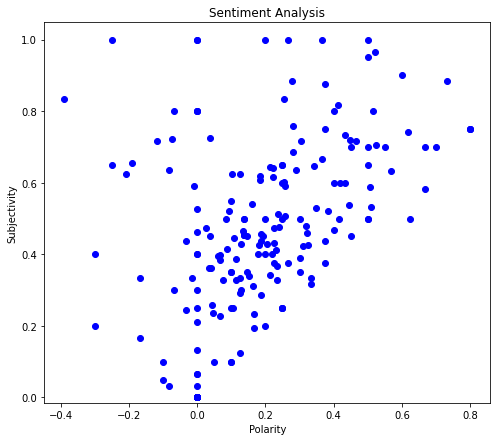

In [98]:
plt.figure(figsize=(8,7))
for i in range(len(df)):
    plt.scatter(df.polarity[i], df.subjectivity[i], color='blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

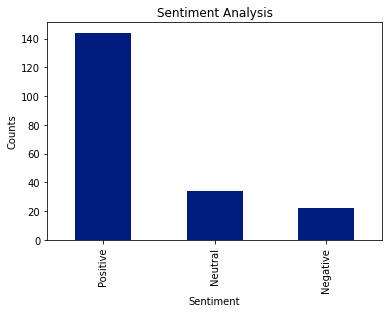

In [97]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df.analysis.value_counts().plot(kind='bar')
plt.show()